In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.svm import SVC

# 2値判別のサポートベクトルマシン

In [2]:
from common import mlbench as ml
X,y = ml.twoDnormals(200, cl=2, sd=1)  # トレーニングデータ
sv = SVC(kernel="linear")
sv.fit(X,y)                                     # フィッティング
np.mean(sv.predict(X)!=y)        # トレーニング誤差の計算

0.059999999999999998

In [3]:
sv.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [4]:
tX,ty = ml.twoDnormals(1000, cl=2, sd=1)   # テストデータ  
py = sv.predict(tX)    # 予測ラベル
np.mean(ty!=py)
1-sv.score(tX,ty)      # scoreで精度を計算．

0.092999999999999972

# カーネル・サポートベクトルマシン

In [5]:
X,y = ml.spirals(300, cycles=1,sd=0.15)       # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1,sd=0.15)     # テストデータ

In [6]:
# 2次多項式カーネル
sv2 = SVC(kernel="poly",degree=2,gamma=1,coef0=1)
sv2.fit(X,y)              # フィッティング
1-sv2.score(tX,ty)        # テスト誤差

0.44399999999999995

In [7]:
# 3次多項式カーネル
sv3 = SVC(kernel="poly",degree=3,gamma=1,coef0=1)
sv3.fit(X,y)              # フィッティング
1-sv3.score(tX,ty)        # テスト誤差

0.23499999999999999

In [8]:
# 判別境界のプロット
from common.contourFittedClass import cplot                       # 等高線プロット用関数 (contourFittedClass.py)
X,y   = ml.spirals(300, cycles=1,sd=0.15)     # トレーニングデータ

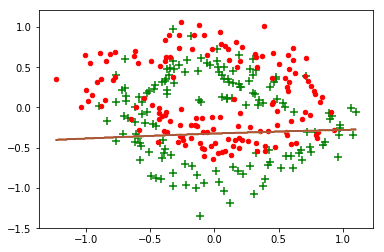

In [9]:
# 2次多項式カーネル
sv = SVC(kernel="poly",degree=2,gamma=1,coef0=1)
sv.fit(X,y) 
cplot(sv,X,y,h=0.005)

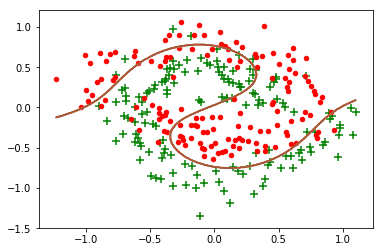

In [10]:
# 3次多項式カーネル
sv = SVC(kernel="poly",degree=3,gamma=1,coef0=1)
sv.fit(X,y) 
cplot(sv,X,y,h=0.005)

# モデルパラメータの選択

In [11]:
from sklearn.model_selection import cross_validate
X,y = ml.twoDnormals(300, cl=2, sd=1)   # トレーニングデータ(2D混合正規)
# K-重交差検証法(K=5)：gamma=0.1, C=1のときの検証誤差を計算
sv = SVC(kernel="rbf",gamma=0.1,C=1)         # SVM(ガウスカーネル)
cv = cross_validate(sv, X, y, scoring='accuracy', cv=5)
cv['test_score']                             # テスト誤差の推定結果を表示

array([ 0.8852459 ,  0.8852459 ,  0.88333333,  0.91525424,  0.93220339])

In [12]:
np.mean(cv['test_score'])       # 交差検証法による精度の推定

0.90025655274613325

In [13]:
1-np.mean(cv['test_score'])     # 検証誤差

0.099743447253866746

In [14]:
from scipy.spatial import distance
X,y = ml.spirals(200, cycles=1.2, sd=0.16)  # トレーニングデータ
dm = distance.pdist(X)                           # 距離行列の計算
# 距離の分位点からgammaの候補値を設定
cg = 1/np.percentile(dm,np.arange(1,100,2))**2 
cg

array([ 71.36742841,  24.29255103,  13.92711232,   9.9098108 ,
         7.72721874,   6.27800765,   5.24562362,   4.47071303,
         3.8839553 ,   3.44371015,   3.0452764 ,   2.77811176,
         2.53975249,   2.3172271 ,   2.12286258,   1.96431924,
         1.82259051,   1.69297573,   1.58237214,   1.48664209,
         1.3942859 ,   1.31748765,   1.24663456,   1.17798289,
         1.11330164,   1.05102617,   0.99717526,   0.94305822,
         0.89493191,   0.85127167,   0.80672751,   0.7698763 ,
         0.7297384 ,   0.69484694,   0.66399198,   0.63191083,
         0.60043054,   0.57071811,   0.5404182 ,   0.51310062,
         0.48589995,   0.45719504,   0.43357837,   0.40700928,
         0.38061321,   0.35416098,   0.32845254,   0.29995537,
         0.26708899,   0.21672845])

In [15]:
ncv = 5                           # K=5でK-重交差検証法を実行
cvg = np.array([])
for g in cg:                      # 各gammaごとに検証誤差を計算
    sv = SVC(kernel="rbf", gamma=g, C=1)
    cv = cross_validate(sv,X,y,scoring='accuracy',cv=ncv)
    cvg = np.r_[cvg,np.mean(cv['test_score'])]
cverr = 1-cvg                         # 検証誤差
opt_gamma = cg[np.argmin(cverr)]      # 最適なgamma
opt_gamma

9.9098107985115096

In [16]:
X,y   = ml.spirals(300, cycles=1,sd=0.15)     # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1,sd=0.15)     # テストデータ

テスト誤差:  0.443


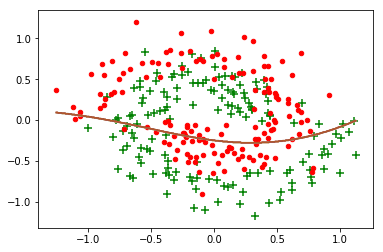

In [17]:
sv = SVC(kernel="rbf",C=1,gamma=cg.min())
sv.fit(X,y)                                           # フィッティング
print("テスト誤差: ", 1-sv.score(tX,ty))            
cplot(sv,X,y,h=0.005)

テスト誤差:  0.149


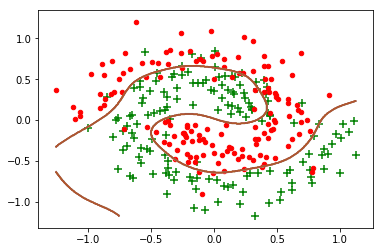

In [18]:
sv = SVC(kernel="rbf",C=1,gamma=opt_gamma)
sv.fit(X,y)                                    # フィッティング
print('テスト誤差: ', 1-sv.score(tX,ty))            
cplot(sv,X,y,h=0.005)

テスト誤差:  0.154


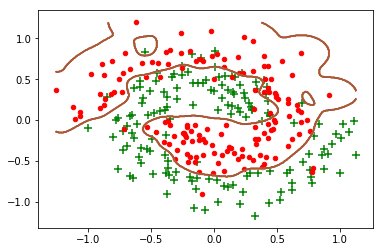

In [19]:
sv = SVC(kernel="rbf",C=1,gamma=cg.max())
sv.fit(X,y)            # フィッティング
print('テスト誤差: ',1-sv.score(tX,ty))          
cplot(sv,X,y,h=0.005)

# 多値判別

In [20]:
G = 8                                   # 8クラスの多値判別
X,y   = ml.twoDnormals(500, cl=G,sd=0.8)  # トレーニングデータ
tX,ty = ml.twoDnormals(1000,cl=G,sd=0.8)  # テストデータ

In [21]:
# 一対一法のサポートベクトルマシンで多値判別
# 線形カーネル
svlin = SVC(kernel='linear',decision_function_shape='ovo')
svlin.fit(X,y)         # フィッティング
1-svlin.score(tX,ty)   # テスト誤差

0.16800000000000004

In [22]:
# ガウスカーネル
svrbf = SVC(kernel='rbf',decision_function_shape='ovo')
svrbf.fit(X,y)         # フィッティング
1-svrbf.score(tX,ty)   # テスト誤差

0.17000000000000004

In [23]:
# 手書き文字認識   
from scipy.spatial import distance           # distanceを使う
# データ読込
tr = pd.read_csv('data/optdigits_train.csv').values
te = pd.read_csv('data/optdigits_test.csv').values
X,y = tr[:,:64], tr[:,64]
tX,ty = te[:,:64], te[:,64]

In [24]:
# 線形カーネルで学習
svlin = SVC(kernel='linear',decision_function_shape='ovo')
svlin.fit(X,y)
1-svlin.score(X,y)     # トレーニング誤差

0.0

In [25]:
1-svlin.score(tX,ty)   # テスト誤差

0.03897550111358572

In [26]:
# ガウスカーネルによる学習
# 一部のデータを使ってヒューリスティクスで gamma を設定．
pX = X[np.random.choice(X.shape[0],round(X.shape[0]/10)),:]
g = 1/np.median(distance.pdist(pX))**2     # 距離行列からgammaの値を設定
g

0.00041254125412541255

In [27]:
svrbf = SVC(kernel='rbf',decision_function_shape='ovo',gamma=g)
svrbf.fit(X,y)
1-svrbf.score(X,y)       # トレーニング誤差

0.0070643642072213408

In [28]:
1-svrbf.score(tX,ty)     # テスト誤差

0.024498886414253906

In [29]:
# ガウスカーネルのカーネル幅を変更
g = 0.01
svrbf = SVC(kernel='rbf',decision_function_shape='ovo',gamma=g)
svrbf.fit(X,y)
1-svrbf.score(X,y)       # トレーニング誤差

0.0

In [30]:
1-svrbf.score(tX,ty)     # テスト誤差

0.26113585746102452